## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}




Experiment with Regulizer = 0.010000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.w

50000/50000 [==============================] - 2s 50us/step - loss: 2.4626 - acc: 0.0971 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0985 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0981 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.4626 - acc: 0.0969 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0979 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.4626 - acc: 0.0983 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.4626 - acc: 0.0983 - val_loss: 2.4627 - val_acc: 0.1000
Epoch 48/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 50us/step - loss: 2.9571 - acc: 0.6151 - val_loss: 3.1961 - val_acc: 0.5273
Epoch 43/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.9137 - acc: 0.6160 - val_loss: 3.1506 - val_acc: 0.5273
Epoch 44/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.8748 - acc: 0.6146 - val_loss: 3.1118 - val_acc: 0.5237
Epoch 45/50
50000/50000 [==============================] - 3s 51us/step - loss: 2.8305 - acc: 0.6199 - val_loss: 3.0461 - val_acc: 0.5286
Epoch 46/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.7901 - acc: 0.6221 - val_loss: 3.0122 - val_acc: 0.5344
Epoch 47/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.7485 - acc: 0.6242 - val_loss: 3.0295 - val_acc: 0.5228
Epoch 48/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.7133 - acc: 0.6250 - val_loss: 2.9550 - val_acc: 0.5285
Epoch 49/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 54us/step - loss: 0.9464 - acc: 0.6665 - val_loss: 1.3722 - val_acc: 0.5258
Epoch 44/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.9349 - acc: 0.6690 - val_loss: 1.4013 - val_acc: 0.5193
Epoch 45/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.9181 - acc: 0.6777 - val_loss: 1.4496 - val_acc: 0.5148
Epoch 46/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.9066 - acc: 0.6821 - val_loss: 1.3556 - val_acc: 0.5401A: 1s - loss: 0.9082 - acc - ETA: 1s - loss: 0.
Epoch 47/50
50000/50000 [==============================] - 3s 51us/step - loss: 0.8987 - acc: 0.6842 - val_loss: 1.3681 - val_acc: 0.5340
Epoch 48/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.8867 - acc: 0.6872 - val_loss: 1.4882 - val_acc: 0.5104
Epoch 49/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.8717 - acc: 0.6941 - val_loss: 1.4160 - val_acc: 0.5265

50000/50000 [==============================] - 3s 52us/step - loss: 0.9362 - acc: 0.6709 - val_loss: 1.5737 - val_acc: 0.4787
Epoch 45/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.9292 - acc: 0.6720 - val_loss: 1.4227 - val_acc: 0.52060.9304 - acc: 0.67
Epoch 46/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.9126 - acc: 0.6790 - val_loss: 1.3904 - val_acc: 0.5288
Epoch 47/50
50000/50000 [==============================] - 3s 52us/step - loss: 0.9034 - acc: 0.6827 - val_loss: 1.4023 - val_acc: 0.5290
Epoch 48/50
50000/50000 [==============================] - 3s 53us/step - loss: 0.8891 - acc: 0.6870 - val_loss: 1.4292 - val_acc: 0.5240
Epoch 49/50
50000/50000 [==============================] - 3s 57us/step - loss: 0.8718 - acc: 0.6913 - val_loss: 1.4300 - val_acc: 0.5240
Epoch 50/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.8650 - acc: 0.6945 - val_loss: 1.5242 - val_acc: 0.5076


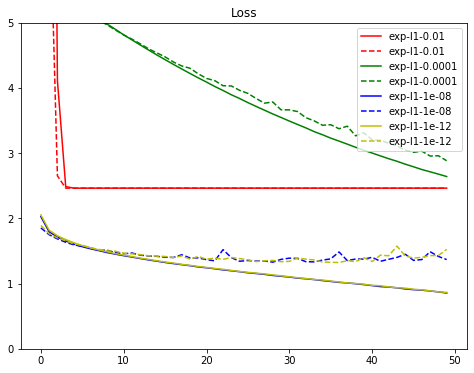

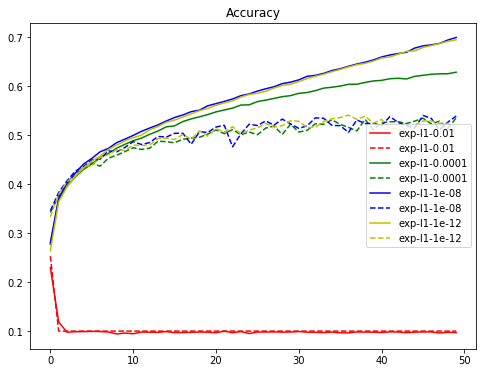

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [10]:
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [12]:
def L12_build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
results = {}
for regulizer_ratio in L1_L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = L12_build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 65us/step - loss: 18.8131 - acc: 0.2616 - val_loss: 17.3708 - val_acc: 0.3307
Epoch 2/50
50000/50000 [==============================] - 3s 55us/step - loss: 16.1543 - acc: 0.3485 - val_loss: 14.9895 - val_acc: 0.3637
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 13.9673 - acc: 0.3741 - val_loss: 12.9805 - val_acc: 0.3835
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 12.1190 - acc: 0.3866 - val_loss: 11.2837 - val_acc: 0.3928
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 10.5478 - acc: 0.3943 - val_loss: 9.8329 - val_acc: 0.4035
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 9.2084 - acc: 0.4027 - val_loss: 8.6115 - val_acc: 0.4031
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 8.0694 - acc: 0.4079 - val_loss: 7.5535 

Epoch 2/50
50000/50000 [==============================] - 3s 54us/step - loss: 13.0102 - acc: 0.3608 - val_loss: 12.1163 - val_acc: 0.3838
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 11.3357 - acc: 0.3843 - val_loss: 10.5916 - val_acc: 0.3900
Epoch 4/50
50000/50000 [==============================] - 3s 54us/step - loss: 9.9224 - acc: 0.4007 - val_loss: 9.2839 - val_acc: 0.4073
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 8.7208 - acc: 0.4144 - val_loss: 8.1863 - val_acc: 0.4150
Epoch 6/50
50000/50000 [==============================] - 3s 53us/step - loss: 7.6984 - acc: 0.4228 - val_loss: 7.2366 - val_acc: 0.4222
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 6.8264 - acc: 0.4289 - val_loss: 6.4365 - val_acc: 0.4305
Epoch 8/50
50000/50000 [==============================] - 3s 54us/step - loss: 6.0819 - acc: 0.4339 - val_loss: 5.7468 - val_acc: 0.4330
Epoch 9/50
50000/50000 [=============

50000/50000 [==============================] - 3s 56us/step - loss: 11.3508 - acc: 0.3790 - val_loss: 10.6048 - val_acc: 0.3834
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 9.9391 - acc: 0.3929 - val_loss: 9.3073 - val_acc: 0.3959
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 8.7382 - acc: 0.4030 - val_loss: 8.2012 - val_acc: 0.4046
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 7.7151 - acc: 0.4126 - val_loss: 7.2543 - val_acc: 0.4122
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 6.8426 - acc: 0.4196 - val_loss: 6.4465 - val_acc: 0.4225
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 6.0971 - acc: 0.4264 - val_loss: 5.7683 - val_acc: 0.4222
Epoch 9/50
50000/50000 [==============================] - 3s 55us/step - loss: 5.4603 - acc: 0.4317 - val_loss: 5.1814 - val_acc: 0.4317
Epoch 10/50
50000/50000 [=========================

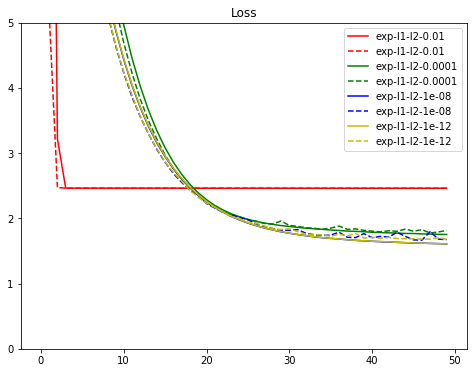

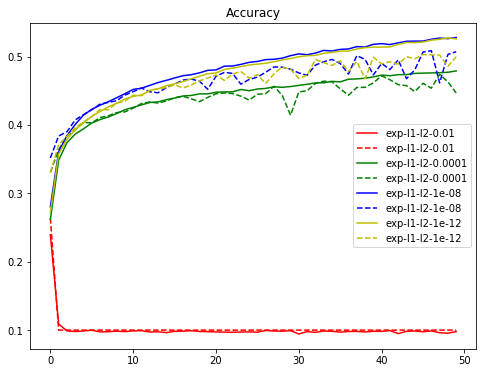

In [14]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()